#Today's problem involves analyzing car data. This dataset comprises 1728 rows and 6 different attributes: buying price, price of maintenance, number of doors, capacity in terms of persons to carry, the relative size of the luggage boot, and the estimated safety value of each car.
#The Problem: You are tasked with constructing and evaluating a decision tree classifier on this dataset. Utilize and compare different types of split criteria (entropy, Gini index, loss). The decision tree will classify the type of car into one of the following categories: 1) unacceptable, 2) acceptable, 3) good, or 4) very good.

#In addition to developing an ML model, you also need to visualize a trees based on your developed models. The tree can be visualized using graphviz library.

#Note - This time, the data is split into several CSV files and stored in a zipped folder. You need to merge or concatenate the data after reading from multiple files.
#Resource for combining dataframes:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

#Resources for drawing a tree using Graphviz:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

https://canvas.anglia.ac.uk/files/4155049/download?download_frd=1



In [ ]:
################################################################################
#
#
# Your code to develop a decision tree classifier.
# Check the accuracy, performance metrices, and confusion metrics.
# Draw the decision tree using Graphviz.
# You can split your code into different cells according to your own choice
#
#
################################################################################

In [2]:
pip install pydotplus

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ----------------------- -------------- 174.1/278.7 kB 5.3 MB/s eta 0:00:01
     -------------------------------------- 278.7/278.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24578 sha256=20d873ce03eee1cb6b26688f8b816a14ccf754a3a9627851c6aa94d6a228827d
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\bd\ce\e8\ff9d9c699514922f57caa22fbd55b0a32761114b4c4acc9e03
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from IPython.display import Image 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import pydotplus
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
%matplotlib inline

In [3]:
df0 = pd.read_csv('car_evaluation_0.csv')
df0.head()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:

df1 = pd.read_csv('car_evaluation_1.csv')
df1.head()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,high,vhigh,2,2,small,med,unacc
1,high,vhigh,2,2,small,high,unacc
2,high,vhigh,2,2,med,low,unacc
3,high,vhigh,2,2,med,med,unacc
4,high,vhigh,2,2,med,high,unacc


In [5]:
df2 = pd.read_csv('car_evaluation_2.csv')
df2.head()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,med,vhigh,2,2,small,med,unacc
1,med,vhigh,2,2,small,high,unacc
2,med,vhigh,2,2,med,low,unacc
3,med,vhigh,2,2,med,med,unacc
4,med,vhigh,2,2,med,high,unacc


In [6]:
df3 = pd.read_csv('car_evaluation_3.csv')
df3.head()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,low,vhigh,2,2,small,med,unacc
1,low,vhigh,2,2,small,high,unacc
2,low,vhigh,2,2,med,low,unacc
3,low,vhigh,2,2,med,med,unacc
4,low,vhigh,2,2,med,high,unacc


In [7]:
dfs = [df0, df1, df2, df3]

new_dfs = pd.concat(dfs, ignore_index = True)

In [8]:
new_dfs.head(40)

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [9]:
new_dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     1727 non-null   object
 1   maintCost    1727 non-null   object
 2   noDoors      1727 non-null   object
 3   noPersons    1727 non-null   object
 4   bootLuggage  1727 non-null   object
 5   safety       1727 non-null   object
 6   decision     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
new_dfs['buyPrice'].value_counts()

high     432
med      432
low      432
vhigh    431
Name: buyPrice, dtype: int64

In [11]:
new_dfs['maintCost'].value_counts()

high     432
med      432
low      432
vhigh    431
Name: maintCost, dtype: int64

In [12]:
new_dfs['noDoors'].value_counts()

3        432
4        432
5more    432
2        431
Name: noDoors, dtype: int64

In [13]:
new_dfs['noPersons'].value_counts()

4       576
more    576
2       575
Name: noPersons, dtype: int64

In [14]:
new_dfs['bootLuggage'].value_counts()

med      576
big      576
small    575
Name: bootLuggage, dtype: int64

In [15]:
new_dfs['safety'].value_counts()

med     576
high    576
low     575
Name: safety, dtype: int64

In [16]:
new_dfs['decision'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: decision, dtype: int64

In [17]:
new_dfs.replace(to_replace =['low', 'med', 'high', 'vhigh'], value = [1,2,3,4], inplace = True)

In [18]:
new_dfs.replace(to_replace =['small', 'big'], value = [1,3], inplace = True)

In [19]:
new_dfs.replace(to_replace=['2', '3', '4', '5more','more'], value = [2,3,4,5,5], inplace = True)

In [20]:
new_dfs.replace(to_replace=['unacc', 'acc', 'good', 'vgood'], value = [1,2,3,4], inplace = True)

In [21]:
new_dfs

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,4,4,2,2,1,2,1
1,4,4,2,2,1,3,1
2,4,4,2,2,2,1,1
3,4,4,2,2,2,2,1
4,4,4,2,2,2,3,1
...,...,...,...,...,...,...,...
1722,1,1,5,5,2,2,3
1723,1,1,5,5,2,3,4
1724,1,1,5,5,3,1,1
1725,1,1,5,5,3,2,3


In [22]:
new_dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   buyPrice     1727 non-null   int64
 1   maintCost    1727 non-null   int64
 2   noDoors      1727 non-null   int64
 3   noPersons    1727 non-null   int64
 4   bootLuggage  1727 non-null   int64
 5   safety       1727 non-null   int64
 6   decision     1727 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [23]:
X = new_dfs.drop('decision',axis=1).values

In [24]:
y = new_dfs['decision'].values

In [25]:
print(X.shape)

(1727, 6)


In [26]:
print(y.shape)

(1727,)


In [27]:
print(X)
print(y)

[[4 4 2 2 1 2]
 [4 4 2 2 1 3]
 [4 4 2 2 2 1]
 ...
 [1 1 5 5 3 1]
 [1 1 5 5 3 2]
 [1 1 5 5 3 3]]
[1 1 1 ... 1 3 4]


In [28]:
#code to split data into train and test set.
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.1, random_state = 4)

In [29]:
print(X_train.shape)

(1554, 6)


In [30]:
print(y_train.shape)

(1554,)


In [31]:
print(X_test.shape)

(173, 6)


In [32]:
print(y_test.shape)

(173,)


In [33]:
#CREATING DECISION TREES
#CRITERIA 1 = entropy

In [86]:
clfE = DecisionTreeClassifier(criterion = 'entropy')

In [87]:
clfE = clfE.fit(X_train, y_train)

In [88]:
figure_name = new_dfs.columns[:-1]
target = new_dfs.columns[:1]

In [89]:
print(figure_name, '\n')
print(target)

Index(['buyPrice', 'maintCost', 'noDoors', 'noPersons', 'bootLuggage',
       'safety'],
      dtype='object') 

Index(['buyPrice'], dtype='object')


In [90]:
tree.export_graphviz(clfE, out_file='tree_grid_clfE.dot',feature_names=figure_name,  
#class_names=target
                      filled=True)  

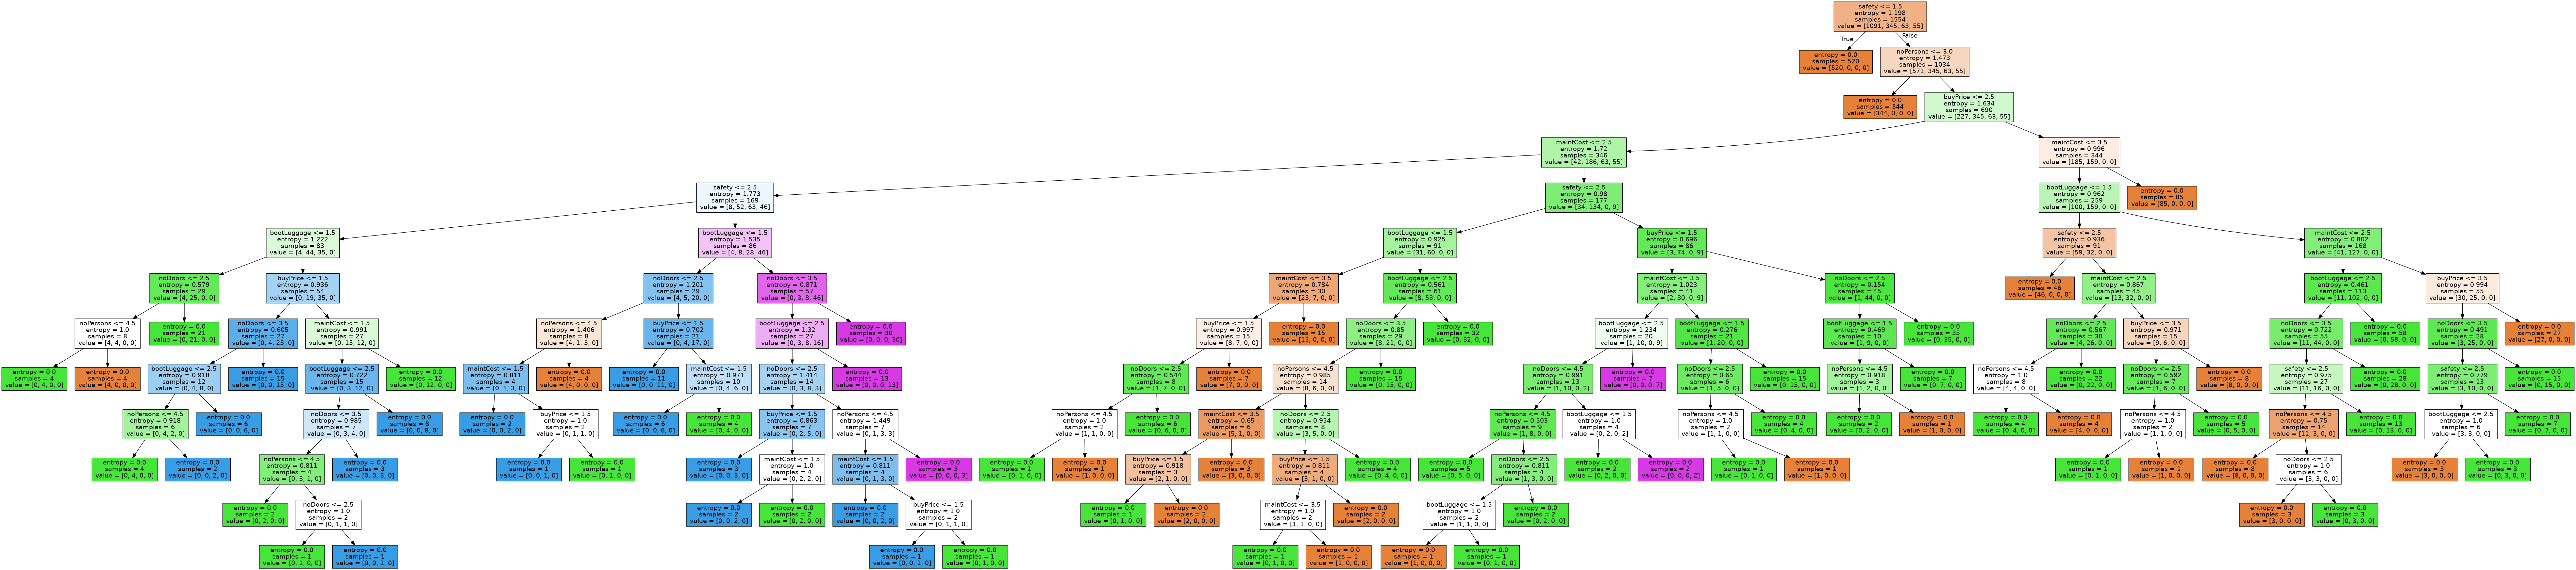

In [91]:
display(Image('tree_grid_clfE.png', unconfined = True))

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [93]:
y_pred = clfE.predict(X_test)

print (print("Accuracy test set: ", accuracy_score(y_test, y_pred)))
acc1 = accuracy_score(y_test, y_pred)
print (print("Precision test set: ", precision_score(y_test, y_pred, average = 'micro' )))
prec1 = precision_score(y_test, y_pred, average = 'micro' )
print (print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' )))
rec1 = recall_score(y_test, y_pred, average = 'micro' )
print (print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' )))
fs1 = f1_score(y_test, y_pred, average = 'micro')

print (classification_report(y_test, y_pred))

Accuracy test set:  0.9826589595375722
None
Precision test set:  0.9826589595375722
None
Recall test set:  0.9826589595375722
None
F-score test set:  0.9826589595375722
None
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       127
           2       0.95      0.97      0.96        36
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00         2

    accuracy                           0.98       173
   macro avg       0.98      0.96      0.97       173
weighted avg       0.98      0.98      0.98       173



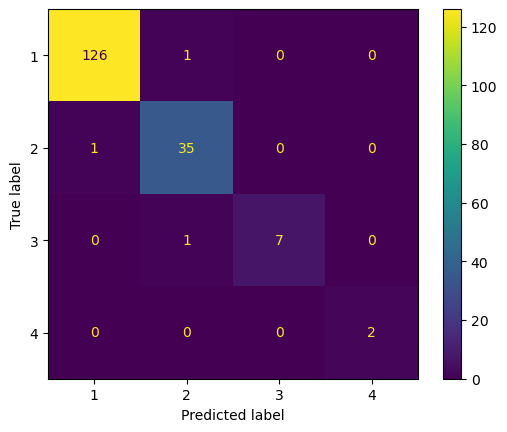

In [94]:
cmatrix = confusion_matrix(y_test, y_pred, labels=clfE.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=clfE.classes_)
disp.plot()

In [95]:
clfG = DecisionTreeClassifier(criterion = 'gini')
clfG = clfG.fit(X_train, y_train)
figure_name = new_dfs.columns[:-1]
target = new_dfs.columns[:1]
print(figure_name, '\n')
print(target)

Index(['buyPrice', 'maintCost', 'noDoors', 'noPersons', 'bootLuggage',
       'safety'],
      dtype='object') 

Index(['buyPrice'], dtype='object')


In [96]:
tree.export_graphviz(clfG, out_file='tree_grid_clfG.dot',feature_names=figure_name,  
#class_names=target
                      filled=True)  

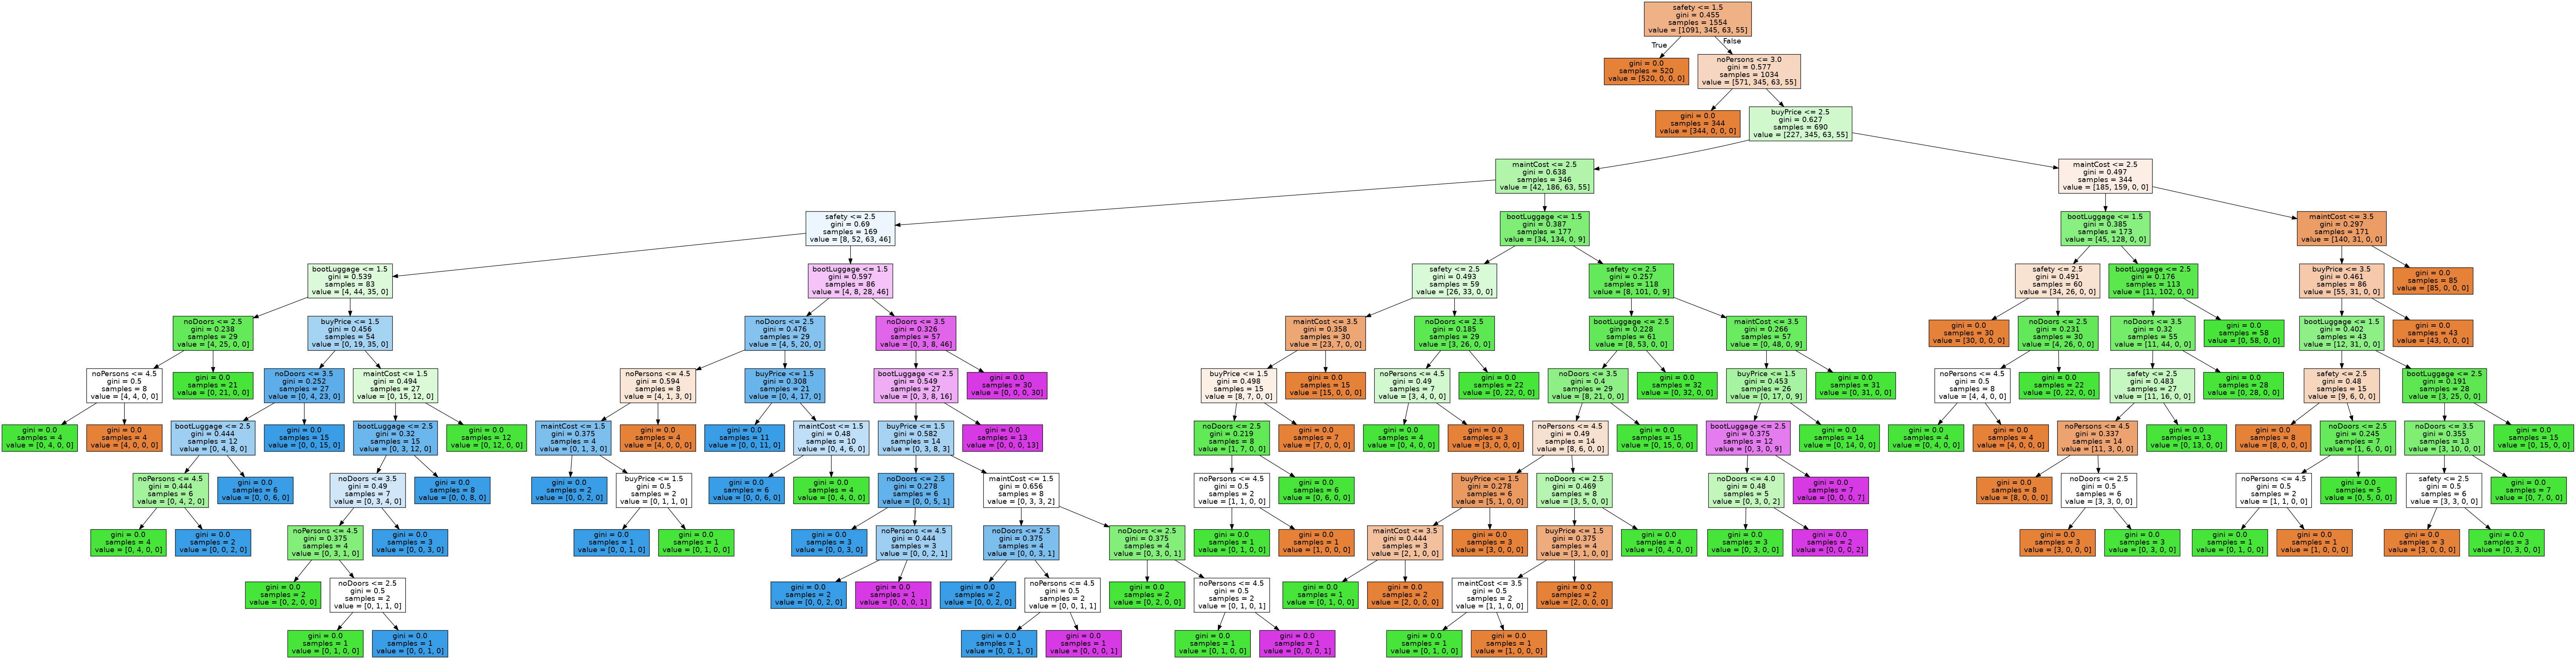

In [97]:
display(Image('tree_grid_clfG.png', unconfined = True))

In [98]:
y_pred = clfG.predict(X_test)

print (print("Accuracy test set: ", accuracy_score(y_test, y_pred)))
acc1 = accuracy_score(y_test, y_pred)
print (print("Precision test set: ", precision_score(y_test, y_pred, average = 'micro' )))
prec1 = precision_score(y_test, y_pred, average = 'micro' )
print (print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' )))
rec1 = recall_score(y_test, y_pred, average = 'micro' )
print (print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' )))
fs1 = f1_score(y_test, y_pred, average = 'micro')

print (classification_report(y_test, y_pred))

Accuracy test set:  0.9884393063583815
None
Precision test set:  0.9884393063583815
None
Recall test set:  0.9884393063583815
None
F-score test set:  0.9884393063583815
None
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       127
           2       0.95      1.00      0.97        36
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00         2

    accuracy                           0.99       173
   macro avg       0.99      0.97      0.98       173
weighted avg       0.99      0.99      0.99       173



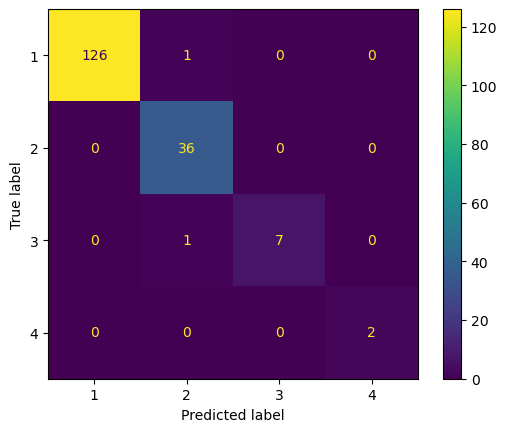

In [99]:
confmatrix = confusion_matrix(y_test, y_pred, labels=clfG.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confmatrix, display_labels=clfG.classes_)
disp.plot()

# Lab Logbook requirements. Answer the following questions and put in your lab logbook (Do not use more than 2 sentences for each question):


1.   What is the decision criterion at each node of the decision tree?
2.   How is entropy/gini index/loss change at each node?
3.   Is entropy decreasing or increasing in as we move down in tree?
4.   How many samples are left at each node? Can you see any pattern?
5.   What information is contained at leaf node?



1. The decision criterion is false for gini index and entropy.
2. The split criteria reduces at each node.
3. Entropy reduces as we move lower on the tree.
4. One sample is remaining at each of the last leaf nodes. 
5. The leaf nodes contain True and False decisions

In [ ]:
# Optional - The following is optional.

################################################################################
#
#
#Compare Decision tree performnce with SVM, KNN, and Logistic Regression.
# You can split your code into different cells according to your own choise
#
#
################################################################################